In [1]:
!pip install numpy==1.26


  Using cached numpy-1.26.0-cp312-cp312-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.0-cp312-cp312-win_amd64.whl (15.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blis 1.0.1 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.0 which is incompatible.
thinc 8.3.2 requires numpy<2.1.0,>=2.0.0; python_version >= "3.9", but you have numpy 1.26.0 which is incompatible.


In [2]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tensorflow.keras import regularizers
import string
import tarfile
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tensorflow import keras
import nltk
import pickle


In [4]:
!pip install textblob
!pip install nltk
!pip install emoji
!pip install tensorflow
!pip install keras
!pip install tensorflow pandas numpy scikit-learn nltk
!pip install spacy
!python -m spacy download en_core_web_sm


nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('brown')
nltk.download('punkt')

  Using cached numpy-2.0.2-cp312-cp312-win_amd64.whl.metadata (59 kB)
Using cached numpy-2.0.2-cp312-cp312-win_amd64.whl (15.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.0
    Uninstalling numpy-1.26.0:
      Successfully uninstalled numpy-1.26.0


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.0.2 which is incompatible.
numba 0.59.1 requires numpy<1.27,>=1.22, but you have numpy 2.0.2 which is incompatible.
pywavelets 1.5.0 requires numpy<2.0,>=1.22.4, but you have numpy 2.0.2 which is incompatible.
streamlit 1.32.0 requires numpy<2,>=1.19.3, but you have numpy 2.0.2 which is incompatible.
tensorflow-intel 2.17.0 requires numpy<2.0.0,>=1.26.0; python_version >= "3.12", but you have numpy 2.0.2 which is incompatible.
Traceback (most recent call last):
  File "<frozen runpy>", line 189, in _run_module_as_main
  File "<frozen runpy>", line 148, in _get_module_details
  File "<frozen runpy>", line 112, in _get_module_details
  File "C:\Users\lenovo\anaconda3\Lib\site-pack

True

In [5]:
# Step 2: Initialize Lemmatizer and Stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [6]:
# Try reading the CSV with different encodings
try:
    data = pd.read_csv("combine_data_final.csv", encoding='latin1')  # Change encoding if necessary
    print(data.head())
except UnicodeDecodeError as e:
    print("Error reading the file:", e)
  


                                             Reviews Sentiment
0  <START this film was just brilliant casting lo...  positive
1  <START big hair big boobs bad music and a gian...  negative
2  <START this has to be one of the worst films o...  negative
3  <START the <UNK> <UNK> at storytelling the tra...  positive
4  <START worst mistake of my life br br i picked...  negative


In [7]:
data['Sentiment'] = data['Sentiment'].map({'positive': 1.0, 'negative': 0.0})
# Check the modified state of the DataFrame
print(data.head())
print(data['Sentiment'].dtype)


                                             Reviews  Sentiment
0  <START this film was just brilliant casting lo...        1.0
1  <START big hair big boobs bad music and a gian...        0.0
2  <START this has to be one of the worst films o...        0.0
3  <START the <UNK> <UNK> at storytelling the tra...        1.0
4  <START worst mistake of my life br br i picked...        0.0
float64


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60665 entries, 0 to 60664
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Reviews    60665 non-null  object 
 1   Sentiment  60662 non-null  float64
dtypes: float64(1), object(1)
memory usage: 948.0+ KB


In [9]:
# Remove rows where 'Sentiment' is NaN
data = data.dropna(subset=['Sentiment'])

# Display the modified DataFrame
data.info()  # This will show you the DataFrame's info after removal
# Save the cleaned DataFrame to a new CSV file
data.to_csv('edited_reviews1.csv', index=False, encoding='utf-8')

# Display the first few rows of the cleaned DataFrame
print(data.head())

<class 'pandas.core.frame.DataFrame'>
Index: 60662 entries, 0 to 60664
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Reviews    60662 non-null  object 
 1   Sentiment  60662 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.4+ MB
                                             Reviews  Sentiment
0  <START this film was just brilliant casting lo...        1.0
1  <START big hair big boobs bad music and a gian...        0.0
2  <START this has to be one of the worst films o...        0.0
3  <START the <UNK> <UNK> at storytelling the tra...        1.0
4  <START worst mistake of my life br br i picked...        0.0


In [10]:
def clean_text(text):
    text = re.sub(r'<START\s*', '', text)  # Remove <START and any following whitespace
    text = re.sub(r'<UNK>', '', text)      # Remove <UNK>
    text = re.sub(r'\s+', ' ', text)       # Replace multiple spaces with a single space
    text = re.sub(r'[^\w\s]+$', '', text) 
    return text.strip()                    # Strip leading/trailing whitespace

# Apply the function to the 'Reviews' column
data['Reviews'] = data['Reviews'].apply(clean_text)

# Display the modified DataFrame
data.head()


,Reviews,Sentiment
0,this film was just brilliant casting location ...,1.0
1,big hair big boobs bad music and a giant safet...,0.0
2,this has to be one of the worst films of the 1...,0.0
3,the at storytelling the traditional sort many ...,1.0
4,worst mistake of my life br br i picked this m...,0.0


In [11]:
# to correct spelling
from textblob import TextBlob
def correct_spelling(text):
    blob = TextBlob(text)
    return str(blob.correct())
    data = data.applymap(lambda x: correct_spelling(x) if isinstance(x, str) else x)
    data.to_csv('edited_reviews1.csv', index=False, encoding='utf-8')
data.head()


,Reviews,Sentiment
0,this film was just brilliant casting location ...,1.0
1,big hair big boobs bad music and a giant safet...,0.0
2,this has to be one of the worst films of the 1...,0.0
3,the at storytelling the traditional sort many ...,1.0
4,worst mistake of my life br br i picked this m...,0.0


In [12]:
#cleaning and lowercasing
def clean_text(text):
    if isinstance(text, str):
        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))
        # Convert to lowercase
        text = text.lower()
    return text
# Apply the cleaning function to each column
for column in data.columns:
    data[column] = data[column].map(clean_text)

# Save the cleaned DataFrame to a new CSV file
data.to_csv('dataset1.csv', index=False, encoding='utf-8')

# Display the first few rows of the cleaned DataFrame
print(data.head())



                                             Reviews  Sentiment
0  this film was just brilliant casting location ...        1.0
1  big hair big boobs bad music and a giant safet...        0.0
2  this has to be one of the worst films of the 1...        0.0
3  the at storytelling the traditional sort many ...        1.0
4  worst mistake of my life br br i picked this m...        0.0


In [68]:

# Define the lemmatization function
def lemmatize_text(text):
    words = nltk.word_tokenize(text.lower())  # Tokenize and convert to lowercase
    lemmatized_words = [
        lemmatizer.lemmatize(word) for word in words if word.isalnum() and word not in stop_words
    ]
    return ' '.join(lemmatized_words)

# Load dataset
df = pd.read_csv('dataset1.csv')  # Adjust with the correct path if needed

# Apply lemmatization and replace the 'Reviews' column with the lemmatized text
df['Reviews'] = df['Reviews'].apply(lemmatize_text)

# Save the modified DataFrame back to CSV
df.to_csv('lemmatized_reviews.csv', index=False)

In [70]:
data = pd.read_csv("lemmatized_reviews.csv", encoding='latin1')  # Change encoding if necessary
print(data.head())

                                             Reviews  Sentiment
0  film brilliant casting location scenery story ...        1.0
1  big hair big boob bad music giant safety pin w...        0.0
2  one worst film 1990s friend watching film targ...        0.0
3  storytelling traditional sort many year event ...        1.0
4  worst mistake life br br picked movie target 5...        0.0


In [72]:
#tokenization
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Define stop words
stop_words = set(stopwords.words('english'))

def clean_and_tokenize(text):
    if isinstance(text, str):
        # Tokenize text
        tokens = word_tokenize(text)
        # Remove stop words
        tokens = [word for word in tokens if word not in stop_words]
    else:
        tokens = []
    return tokens

# Apply tokenization only to the 'Reviews' column
if 'Reviews' in data.columns:
    data['Reviews'] = data['Reviews'].map(clean_and_tokenize)

# Save the cleaned DataFrame to a new CSV file
data.to_csv('tokenized.csv', index=False, encoding='utf-8')

# Display the first few rows of the cleaned DataFrame
print(data.head())


                                             Reviews  Sentiment
0  [film, brilliant, casting, location, scenery, ...        1.0
1  [big, hair, big, boob, bad, music, giant, safe...        0.0
2  [one, worst, film, 1990s, friend, watching, fi...        0.0
3  [storytelling, traditional, sort, many, year, ...        1.0
4  [worst, mistake, life, br, br, picked, movie, ...        0.0


In [74]:
data.shape

(60662, 2)

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60662 entries, 0 to 60661
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Reviews    60662 non-null  object 
 1   Sentiment  60662 non-null  float64
dtypes: float64(1), object(1)
memory usage: 948.0+ KB


In [78]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle

# Load the data from the CSV file
data_path = 'tokenized.csv'
data = pd.read_csv(data_path)

# Assuming 'text' column contains the preprocessed reviews
reviews = data['Reviews'].tolist()

# Initialize the tokenizer
tokenizer = Tokenizer(num_words=10000)  # Adjust num_words based on vocabulary size limit
tokenizer.fit_on_texts(reviews)

# Convert the text to sequences
sequences = tokenizer.texts_to_sequences(reviews)
print("First  sequences:", sequences[:1])

# Pad the sequences to ensure uniform length
maxlen = 100  # You can adjust maxlen as needed for your data
padded_sequences = pad_sequences(sequences, maxlen=maxlen)

# Check the shape of the padded sequences
print(f"Padded Sequences Shape: {padded_sequences.shape}")

with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

print("Tokenizer saved to 'tokenizer.pickle'")


First  sequences: [[3, 416, 934, 793, 1191, 9, 338, 3688, 15, 3557, 56, 167, 30, 681, 428, 402, 37, 58, 234, 298, 4268, 779, 340, 97, 65, 1432, 3, 1676, 3411, 380, 3, 21, 416, 18, 1114, 3, 436, 514, 13, 283, 213, 34, 1380, 5225, 402, 15, 3257, 43, 518, 33, 44, 826, 3, 122, 7, 313, 22, 38, 48, 198, 167, 3030, 696, 416, 168, 303, 223, 840, 31, 105, 72, 1897, 107, 6011, 131, 3, 168, 402, 5442, 130, 26, 31, 131, 9, 1179, 195, 191, 29, 4794, 77]]
Padded Sequences Shape: (60662, 100)
Tokenizer saved to 'tokenizer.pickle'


In [80]:
print(data.head())

                                             Reviews  Sentiment
0  ['film', 'brilliant', 'casting', 'location', '...        1.0
1  ['big', 'hair', 'big', 'boob', 'bad', 'music',...        0.0
2  ['one', 'worst', 'film', '1990s', 'friend', 'w...        0.0
3  ['storytelling', 'traditional', 'sort', 'many'...        1.0
4  ['worst', 'mistake', 'life', 'br', 'br', 'pick...        0.0


In [82]:
# Check the column names to find the text column
print(data.columns)


Index(['Reviews', 'Sentiment'], dtype='object')


In [84]:
X = padded_sequences
y = data['Sentiment']
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Shape of X: (60662, 100)
Shape of y: (60662,)


In [86]:
assert not np.any(np.isnan(X_train)), "Training data contains NaN values"
assert not np.any(np.isinf(X_train)), "Training data contains infinite values"
assert not np.any(np.isnan(y_train)), "Training data contains NaN values"
assert not np.any(np.isinf(y_train)), "Training data contains infinite values"



In [88]:
vocab_size = 10000  # Number of unique words (based on the tokenizer)
embedding_dim = 16  # Embedding vector size
dropout_rate = 0.5  # Dropout rate for inputs 

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim),
    
    # First LSTM layer with dropout
    tf.keras.layers.LSTM(8),  # Return sequences to pass to the next LSTM layer
    tf.keras.layers.BatchNormalization(),
    
    # Dropout layer after the first LSTM layer
    tf.keras.layers.Dropout(dropout_rate),

    # Dense output layer for binary classification (sentiment prediction)
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), metrics=['accuracy'])

In [98]:

history = model.fit(X_train, y_train, epochs=30,batch_size=64, validation_data=(X_test, y_test))

Epoch 1/30
759/759 ━━━━━━━━━━━━━━━━━━━━ 40s 44ms/step - accuracy: 0.5105 - loss: 0.7175 - val_accuracy: 0.5380 - val_loss: 0.6902
Epoch 2/30
759/759 ━━━━━━━━━━━━━━━━━━━━ 36s 38ms/step - accuracy: 0.5329 - loss: 0.7011 - val_accuracy: 0.5683 - val_loss: 0.6798
Epoch 3/30
759/759 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.5573 - loss: 0.6870 - val_accuracy: 0.5925 - val_loss: 0.6687
Epoch 4/30
759/759 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.5756 - loss: 0.6745 - val_accuracy: 0.6142 - val_loss: 0.6580
Epoch 5/30
759/759 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.5993 - loss: 0.6623 - val_accuracy: 0.6351 - val_loss: 0.6473
Epoch 6/30
759/759 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - accuracy: 0.6144 - loss: 0.6525 - val_accuracy: 0.6515 - val_loss: 0.6362
Epoch 7/30
759/759 ━━━━━━━━━━━━━━━━━━━━ 42s 38ms/step - accuracy: 0.6240 - loss: 0.6437 - val_accuracy: 0.6696 - val_loss: 0.6244
Epoch 8/30
759/759 ━━━━━━━━━━━━━━━━━━━━ 43s 41ms/step - accuracy: 0.6403 - loss: 0.6284 - 

In [100]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 16)        │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 8)              │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 482,493 (1.84 MB)

 Trainable params: 160,825 (628.22 KB)

 Non-trainable params: 16 (64.00 B)

 Optimizer params: 321,652 (1.23 MB)

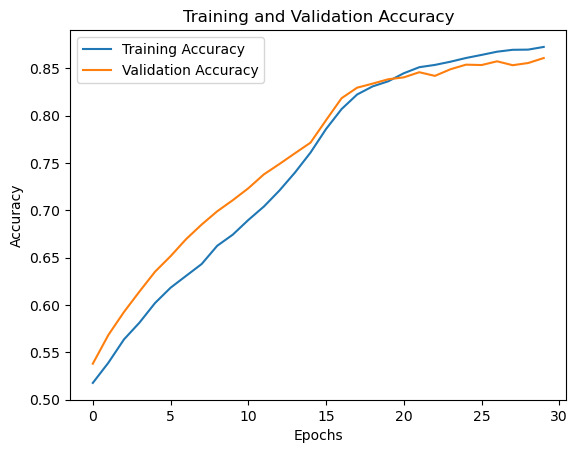

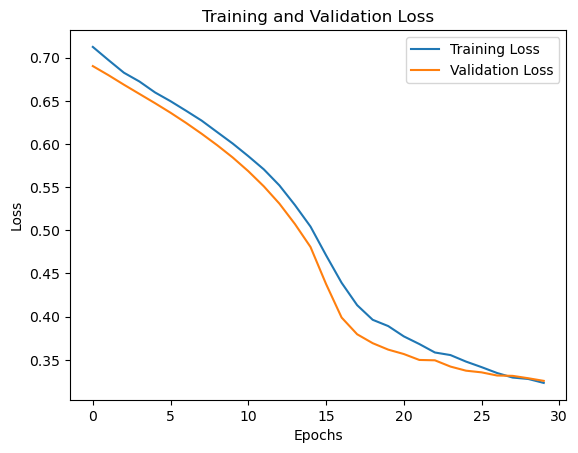

In [102]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [104]:
model.save('fukkked.keras')
data.head()

,Reviews,Sentiment
0,"['film', 'brilliant', 'casting', 'location', '...",1.0
1,"['big', 'hair', 'big', 'boob', 'bad', 'music',...",0.0
2,"['one', 'worst', 'film', '1990s', 'friend', 'w...",0.0
3,"['storytelling', 'traditional', 'sort', 'many'...",1.0
4,"['worst', 'mistake', 'life', 'br', 'br', 'pick...",0.0


In [106]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('fukkked.keras')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [108]:
# Evaluate on test data
print(f"Shape of X_train: {X_train.shape}, Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}, Shape of y_test: {y_test.shape}")
test_loss, test_acc = loaded_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')




Shape of X_train: (48529, 100), Shape of y_train: (48529,)
Shape of X_test: (12133, 100), Shape of y_test: (12133,)
380/380 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8645 - loss: 0.3193
Test Accuracy: 0.8609577417373657


In [109]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [112]:
# Predict sentiment on the test data
predictions = loaded_model.predict(X_test)

# # Keep predictions as float values
# print("Predicted Sentiment Scores:")
# for i, prediction in enumerate(predictions):
#     print(f"Review {i+1}  : Sentiment Score: {prediction[0]:.4f}")




380/380 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


In [113]:
# Convert predictions to binary values (0 or 1)
predicted_classes = (predictions > 0.5).astype(int)
print(predicted_classes)




[[0]
 [1]
 [0]
 ...
 [1]
 [1]
 [0]]


In [116]:
print("Length of y_test:", len(y_test))
print("Length of predicted_classes:", len(predicted_classes))

Length of y_test: 12133
Length of predicted_classes: 12133


In [120]:
# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_classes)
print(f'Test Accuracy: {accuracy:.4f}')

# Print classification report
report = classification_report(y_test, predicted_classes)
print(report)

# Print confusion matrix
cm = confusion_matrix(y_test, predicted_classes)
print("Confusion Matrix:")
print(cm)


Test Accuracy: 0.8610
              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86      5959
         1.0       0.85      0.88      0.87      6174

    accuracy                           0.86     12133
   macro avg       0.86      0.86      0.86     12133
weighted avg       0.86      0.86      0.86     12133

Confusion Matrix:
[[5036  923]
 [ 764 5410]]


In [122]:
import pickle
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Step 1: Load the saved tokenizer and model
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Load your trained model (assuming it's saved as 'sentiment_model.keras')
loaded_model = load_model('fukkked.keras')

# Retrieve the word index
word_index = tokenizer.word_index

# Clean the word index (if necessary)
cleaned_word_index = {key.strip("'"): value for key, value in word_index.items()}

# Step 2: Input comment
new_comment = "i the movie was a great movie"

# Step 3: Tokenize the input comment manually
comment_tokens = new_comment.lower().split()  # Lowercasing and splitting the comment
comment_sequence = [cleaned_word_index.get(word, 0) for word in comment_tokens]  # Convert words to indices

print("Comment Sequence:", comment_sequence)

# Step 4: Pad the sequence
maxlen = 100  # This should be the same as used during training
padded_sequence = pad_sequences([comment_sequence], maxlen=maxlen)

print("Padded Sequence:", padded_sequence)

# Step 5: Apply the model to get the prediction
prediction = loaded_model.predict(padded_sequence)
print("Prediction:", prediction)

# Step 6: Interpret the output
sentiment = 'Positive' if prediction >= 0.5 else 'Negative'
print(f"Sentiment: {sentiment}")


Comment Sequence: [0, 0, 2, 0, 0, 21, 2]
Padded Sequence: [[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2
   0  0 21  2]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step
Prediction: [[0.7102014]]
Sentiment: Positive


In [124]:
print("Word Index:", tokenizer.word_index)  # This will show the mapping of words to their indices.


Word Index: {"'br'": 1, "'movie'": 2, "'film'": 3, "'one'": 4, "'like'": 5, "'time'": 6, "'good'": 7, "'character'": 8, "'story'": 9, "'even'": 10, "'get'": 11, "'make'": 12, "'would'": 13, "'see'": 14, "'really'": 15, "'well'": 16, "'scene'": 17, "'much'": 18, "'bad'": 19, "'people'": 20, "'great'": 21, "'also'": 22, "'first'": 23, "'way'": 24, "'show'": 25, "'dont'": 26, "'thing'": 27, "'made'": 28, "'life'": 29, "'could'": 30, "'think'": 31, "'go'": 32, "'know'": 33, "'watch'": 34, "'love'": 35, "'plot'": 36, "'actor'": 37, "'two'": 38, "'many'": 39, "'seen'": 40, "'year'": 41, "'never'": 42, "'end'": 43, "'say'": 44, "'look'": 45, "'acting'": 46, "'best'": 47, "'little'": 48, "'ever'": 49, "'man'": 50, "'better'": 51, "'take'": 52, "'work'": 53, "'come'": 54, "'still'": 55, "'part'": 56, "'something'": 57, "'director'": 58, "'find'": 59, "'give'": 60, "'want'": 61, "'back'": 62, "'lot'": 63, "'im'": 64, "'real'": 65, "'performance'": 66, "'watching'": 67, "'guy'": 68, "'doesnt'": 6